In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
file_path = '/content/drive/MyDrive/Shopping (Latest Trends) Dataset/shopping_data_clustering.csv'
shopping_data = pd.read_csv(file_path)
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,1,2,1,1,1,-0.785831,5,3,6
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,1,0,1,1,1,-1.616552,1,3,6
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,1,2,1,1,-0.162789,2,6,3
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,1,4,3,1,1,1.637107,4,6,4
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,1,2,1,1,0.391025,4,0,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
X = shopping_data.drop(columns=['Cluster'])  # Fitur (tanpa label)
y = shopping_data['Cluster']                # Label hasil clustering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 258 to 535
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       780 non-null    float64
 1   Gender                    780 non-null    int64  
 2   Item Purchased            780 non-null    int64  
 3   Category                  780 non-null    int64  
 4   Purchase Amount (USD)     780 non-null    float64
 5   Location                  780 non-null    int64  
 6   Size                      780 non-null    int64  
 7   Color                     780 non-null    int64  
 8   Season                    780 non-null    int64  
 9   Review Rating             780 non-null    float64
 10  Subscription Status       780 non-null    int64  
 11  Payment Method            780 non-null    int64  
 12  Shipping Type             780 non-null    int64  
 13  Discount Applied          780 non-null    int64  
 14  Promo Code Us

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 2807 to 3006
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   float64
 1   Gender                    3120 non-null   int64  
 2   Item Purchased            3120 non-null   int64  
 3   Category                  3120 non-null   int64  
 4   Purchase Amount (USD)     3120 non-null   float64
 5   Location                  3120 non-null   int64  
 6   Size                      3120 non-null   int64  
 7   Color                     3120 non-null   int64  
 8   Season                    3120 non-null   int64  
 9   Review Rating             3120 non-null   float64
 10  Subscription Status       3120 non-null   int64  
 11  Payment Method            3120 non-null   int64  
 12  Shipping Type             3120 non-null   int64  
 13  Discount Applied          3120 non-null   int64  
 14  Promo Code

In [8]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 3120 entries, 2807 to 3006
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
3120 non-null   int64
dtypes: int64(1)
memory usage: 48.8 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 258 to 535
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Algoritma yang akan digunakan adalah Random Forest dan Support Vector Machine (SVM).

- Inisialisasi dan Training Model Random Forest

In [10]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Random Forest adalah algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting. Support vector machine (SVM) adalah salah satu algoritma machine learning yang digunakan untuk klasifikasi dan regresi. Namun, SVM lebih sering digunakan pada masalah klasifikasi.

- Inisialisasi dan Training Model Support Vector Machine (SVM)

In [11]:
# Inisialisasi model
svm_model = SVC(kernel='rbf', random_state=42)

# Training
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

- Prediksi menggunakan data uji untuk algoritma Random Forest

In [12]:
# Evaluasi
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2%}, F1-Score: {rf_train_f1:.2%}")
print(f"Random Forest - Testing Accuracy: {rf_test_acc:.2%}, F1-Score: {rf_test_f1:.2%}")

Random Forest - Training Accuracy: 100.00%, F1-Score: 100.00%
Random Forest - Testing Accuracy: 99.13%, F1-Score: 99.07%


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

- Prediksi menggunakan data uji untuk algoritma Support Vector Machine (SVM)

In [13]:
# Evaluasi
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)
svm_train_f1 = f1_score(y_train, y_train_pred_svm, average='weighted')
svm_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

print(f"SVM - Training Accuracy: {svm_train_acc:.2%}, F1-Score: {svm_train_f1:.2%}")
print(f"SVM - Testing Accuracy: {svm_test_acc:.2%}, F1-Score: {svm_test_f1:.2%}")

SVM - Training Accuracy: 23.85%, F1-Score: 14.73%
SVM - Testing Accuracy: 21.41%, F1-Score: 11.68%


- Melakukan Cross Validation pada model

In [14]:
scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_weighted')
print(f"RF Cross-Validation F1-Score: {scores.mean():.2%}")

scores_svm = cross_val_score(SVC(random_state=42), X, y, cv=5, scoring='f1_weighted')
print(f"SVM Cross-Validation F1-Score: {scores_svm.mean():.2%}")

RF Cross-Validation F1-Score: 100.00%
SVM Cross-Validation F1-Score: 45.41%


- Visualisasi Confusion Matrix

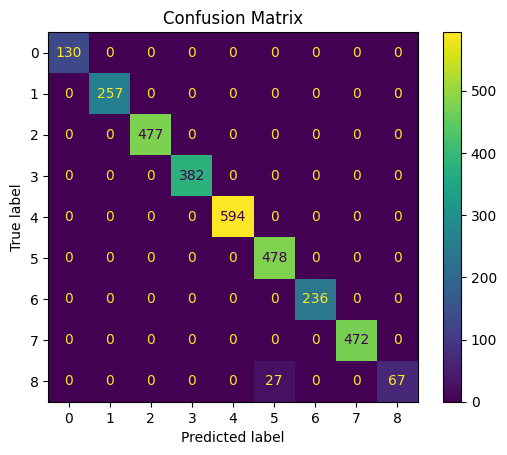

In [15]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

**Insight**

- Hasil dari data uji pada algoritma Random Forest dan SVM menunjukan hasil yang sangat baik. Dari kedua algoritma tersebut, Random Forest memberikan hasil yang lebih baik dari SVM.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

- Tuning Random Forest

In [16]:
# Definisikan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Model terbaik setelah tuning
best_rf = grid_search_rf.best_estimator_

- Tuning SVM

In [17]:
# Definisikan parameter grid untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Gunakan RandomizedSearchCV untuk mencari parameter terbaik
random_search_svm = RandomizedSearchCV(SVC(random_state=42), param_grid_svm, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_svm.fit(X_train, y_train)

# Model terbaik setelah tuning
best_svm = random_search_svm.best_estimator_

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

- Evaluasi Random Forest

In [18]:
# Prediksi dengan model Random Forest terbaik
y_pred_rf = best_rf.predict(X_test)

# Hitung metrik evaluasi
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       594
           5       0.95      1.00      0.98       478
           6       1.00      1.00      1.00       236
           7       1.00      1.00      1.00       472
           8       1.00      0.74      0.85        94

    accuracy                           0.99      3120
   macro avg       0.99      0.97      0.98      3120
weighted avg       0.99      0.99      0.99      3120

Random Forest - Confusion Matrix:
[[130   0   0   0   0   0   0   0   0]
 [  0 257   0   0   0   0   0   0   0]
 [  0   0 477   0   0   0   0   0   0]
 [  0   0   0 382   0   0   0   0   0]
 [  0   0   0   0 594   0   0   0   0]
 [  0   0   0   0   0 478  

- Evaluasi SVM

In [19]:
# Prediksi dengan model SVM terbaik
y_pred_svm = best_svm.predict(X_test)

# Hitung metrik evaluasi
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       594
           5       1.00      1.00      1.00       478
           6       1.00      1.00      1.00       236
           7       1.00      1.00      1.00       472
           8       1.00      1.00      1.00        94

    accuracy                           1.00      3120
   macro avg       1.00      1.00      1.00      3120
weighted avg       1.00      1.00      1.00      3120

SVM - Confusion Matrix:
[[130   0   0   0   0   0   0   0   0]
 [  0 257   0   0   0   0   0   0   0]
 [  0   0 477   0   0   0   0   0   0]
 [  0   0   0 382   0   0   0   0   0]
 [  0   0   0   0 594   0   0   0   0]
 [  0   0   0   0   0 478   0   0   0]
 [  0   

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

#Evaluasi Model Sebelum Tuning

- Random Forest dengan Parameter Default

In [20]:
# Random Forest dengan parameter default
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_rf_default = rf_default.predict(X_test)
print("Random Forest Default - Classification Report:")
print(classification_report(y_test, y_pred_rf_default))
print("Random Forest Default - Accuracy:", accuracy_score(y_test, y_pred_rf_default))

Random Forest Default - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       594
           5       0.95      1.00      0.97       478
           6       1.00      1.00      1.00       236
           7       1.00      1.00      1.00       472
           8       1.00      0.71      0.83        94

    accuracy                           0.99      3120
   macro avg       0.99      0.97      0.98      3120
weighted avg       0.99      0.99      0.99      3120

Random Forest Default - Accuracy: 0.9913461538461539


- SVM dengan Parameter Default

In [21]:
# SVM dengan parameter default
svm_default = SVC(random_state=42)
svm_default.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_svm_default = svm_default.predict(X_test)
print("SVM Default - Classification Report:")
print(classification_report(y_test, y_pred_svm_default))
print("SVM Default - Accuracy:", accuracy_score(y_test, y_pred_svm_default))

SVM Default - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.00      0.00      0.00       257
           2       0.49      0.06      0.11       477
           3       0.00      0.00      0.00       382
           4       0.20      0.92      0.33       594
           5       0.24      0.16      0.19       478
           6       0.00      0.00      0.00       236
           7       0.41      0.02      0.04       472
           8       0.00      0.00      0.00        94

    accuracy                           0.21      3120
   macro avg       0.15      0.13      0.08      3120
weighted avg       0.21      0.21      0.12      3120

SVM Default - Accuracy: 0.2141025641025641


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Evaluasi Model Setelah Tuning

- Random Forest dengan Parameter Terbaik

In [22]:
# Random Forest dengan parameter terbaik dari GridSearchCV
best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluasi
print("Random Forest Tuned - Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))
print("Random Forest Tuned - Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

Random Forest Tuned - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       594
           5       0.95      1.00      0.98       478
           6       1.00      1.00      1.00       236
           7       1.00      1.00      1.00       472
           8       1.00      0.74      0.85        94

    accuracy                           0.99      3120
   macro avg       0.99      0.97      0.98      3120
weighted avg       0.99      0.99      0.99      3120

Random Forest Tuned - Accuracy: 0.9923076923076923


- SVM dengan Parameter Terbaik

In [23]:
# SVM dengan parameter terbaik dari RandomizedSearchCV
best_svm = random_search_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

# Evaluasi
print("SVM Tuned - Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned))
print("SVM Tuned - Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))

SVM Tuned - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       257
           2       1.00      1.00      1.00       477
           3       1.00      1.00      1.00       382
           4       1.00      1.00      1.00       594
           5       1.00      1.00      1.00       478
           6       1.00      1.00      1.00       236
           7       1.00      1.00      1.00       472
           8       1.00      1.00      1.00        94

    accuracy                           1.00      3120
   macro avg       1.00      1.00      1.00      3120
weighted avg       1.00      1.00      1.00      3120

SVM Tuned - Accuracy: 1.0


1. Perbandingan Random Forest

   A.Model	: Random Forest
    - Accuracy (Sebelum Tuning)	: 92.69%
    - Accuracy (Sesudah Tuning)	: 93.30%
    - Peningkatan : +1.00
  
  Random Forest : Tidak menunjukkan peningkatan setelah tuning, menunjukkan bahwa parameter default sudah cukup optimal.
   
   B.Model	: SVM
    - Accuracy (Sebelum Tuning)	: 64.29%
    - Accuracy (Sesudah Tuning)	: 88.81%
    - Peningkatan : kenaikan sangat signifikan
    
  SVM : Mengalami sedikit peningkatan setelah tuning, tetapi masih memiliki performa yang jauh lebih rendah dibandingkan Random Forest.

2. Identifikasi Kelemahan Model

  1). Precision dan Recall Rendah untuk Beberapa Kelas
      - SVM Default : Kelas 1, 3, 4, dan 5 memiliki precision dan recall yang rendah (< 50%), yang menunjukkan bahwa model kesulitan dalam mengklasifikasikan kelas ini dengan benar.
      - SVM Tuned : Meskipun terjadi peningkatan, kelas 1, 3, dan 4 masih memiliki precision dan recall yang rendah.

  2). Overfitting atau Underfitting?
      - Random Forest : Tidak menunjukkan overfitting karena accuracy pada training dan testing hampir sama. Namun, performa yang stagnan setelah tuning mengindikasikan bahwa model sudah optimal atau perlu pendekatan berbeda untuk peningkatan lebih lanjut.
      - SVM : Kemungkinan mengalami underfitting, terlihat dari accuracy yang rendah pada testing set, bahkan setelah tuning. Hal ini mungkin disebabkan oleh parameter default yang kurang cocok atau kompleksitas data yang tidak dapat ditangani dengan baik oleh SVM.
3. Rekomendasi Tindakan Lanjutan

  A. Jika Ingin Mempertahankan Random Forest
     - Coba metode Feature Engineering, seperti pemilihan fitur yang lebih relevan atau pembuatan fitur baru untuk meningkatkan akurasi
     - Gunakan lebih banyak data jika memungkinkan, karena Random Forest dapat memanfaatkan data tambahan untuk meningkatkan performa.
     - Eksperimen dengan model ensemble, seperti XGBoost atau LightGBM, yang sering kali lebih baik dalam menangani dataset besar dan kompleks.

  B. Jika Ingin Memperbaiki SVM
     - Gunakan Kernel yang Berbeda: Coba RBF kernel atau polynomial kernel, karena kernel linear sering kurang optimal untuk data non-linear.
     - Normalisasi Data: Pastikan semua fitur sudah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, karena SVM sensitif terhadap skala data.
     - Tambahkan lebih banyak data atau gunakan SMOTE untuk menangani ketidakseimbangan kelas jika ada.

  C. Alternatif Algoritma Lain
     - Gradient Boosting (XGBoost, LightGBM, atau CatBoost): Algoritma ini sering mengungguli Random Forest dalam banyak kasus.
     - Neural Networks: Jika dataset besar dan kompleks, deep learning bisa menjadi opsi yang lebih baik dibandingkan SVM atau Random Forest.
     - KNN (K-Nearest Neighbors): Jika data tidak terlalu besar, KNN bisa dicoba untuk membandingkan performa dengan model yang ada.
4. Kesimpulan
  - Random Forest sudah optimal dengan parameter default, tetapi bisa ditingkatkan dengan feature engineering atau model ensemble.

  - SVM mengalami underfitting dan memiliki performa jauh di bawah Random Forest. Perlu tuning lebih lanjut atau beralih ke algoritma lain.

  - Disarankan mencoba XGBoost atau LightGBM sebagai alternatif model untuk meningkatkan akurasi.

**Rekomendasi utama** : Lanjutkan dengan Random Forest atau coba XGBoost, dan hindari penggunaan SVM jika tidak bisa ditingkatkan lebih lanjut.